<a href="https://colab.research.google.com/github/engcrisoliveira/clustering-basico-com-python/blob/main/clustering_basico_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise para agrupamento de vinhos por clustering

In [28]:
#Instalando o plotly
!pip install plotly==4.1.0

In [29]:
#Importando as bibliotecas
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [30]:
#Importando os dados
df = pd.read_csv('wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [31]:
df.shape

(178, 14)

In [32]:
#Renomeando colunas
df = df.rename(columns = {'Alcohol' : 'alcool', 
                    'Malic_Acid' : 'acido_malico',
                    'Ash' : 'po',
                    'Ash_Alcanity' : 'alcalinidade_po',
                    'Magnesium' : 'magnesio',
                    'Total_Phenols' : 'fenois_totais',
                    'Flavanoids' : 'flavonoides',
                    'Nonflavanoid_Phenols' : 'fenois_nao_flavonoides',
                    'Proanthocyanins' : 'proantocianidinas',
                    'Color_Intensity' : 'intensidade_da_cor',
                    'Hue' : 'matiz',
                    'Proline' : 'proline',
                    'Customer_Segment' : 'segmento_de_clientes'                        
})

# Analisando os dados

In [33]:
df.describe()

,alcool,acido_malico,po,alcalinidade_po,magnesio,fenois_totais,flavonoides,fenois_nao_flavonoides,proantocianidinas,intensidade_da_cor,matiz,OD280,proline,segmento_de_clientes
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# Atributos com informação importante

In [34]:
#Usando matriz de correlação
matriz_corr = df.corr()
matriz_corr

,alcool,acido_malico,po,alcalinidade_po,magnesio,fenois_totais,flavonoides,fenois_nao_flavonoides,proantocianidinas,intensidade_da_cor,matiz,OD280,proline,segmento_de_clientes
alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
acido_malico,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
fenois_totais,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavonoides,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
fenois_nao_flavonoides,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proantocianidinas,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
intensidade_da_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [35]:
#Instalando a biblioteca biokit
#A versão atual do biokit (0.4.6) não é compatível com o Windows 10, é necessário instalar a versão 0.4.2, neste caso. 
!pip install biokit=="0.4.2"

In [36]:
#Importando as bilbiotecas
from biokit.viz import corrplot
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/biokit/viz/linkage.py:41: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

/usr/local/lib/python3.7/dist-packages/biokit/viz/corrplot.py:335: MatplotlibDeprecationWarning:


The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.



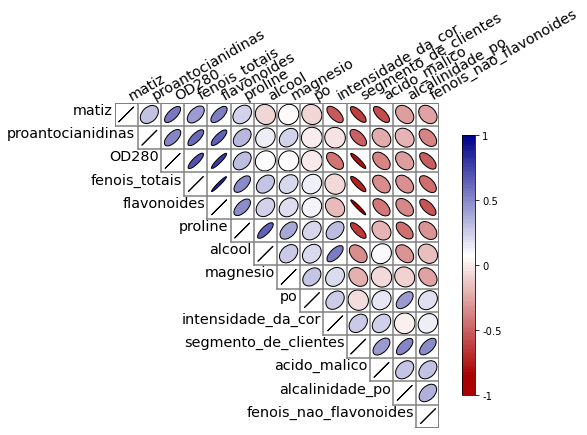

In [37]:
#Observando a correlação entre os dados
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

#Normalização

In [38]:
df.columns

Index(['alcool', 'acido_malico', 'po', 'alcalinidade_po', 'magnesio',
       'fenois_totais', 'flavonoides', 'fenois_nao_flavonoides',
       'proantocianidinas', 'intensidade_da_cor', 'matiz', 'OD280', 'proline',
       'segmento_de_clientes'],
      dtype='object')

In [42]:
#Normalização manual
atributos = df.columns
for atributo in atributos:
    df[atributo] = (df[atributo] - min(df[atributo]))/(max(df[atributo]) - min(df[atributo]))

In [43]:
df.describe()

,alcool,acido_malico,po,alcalinidade_po,magnesio,fenois_totais,flavonoides,fenois_nao_flavonoides,proantocianidinas,intensidade_da_cor,matiz,OD280,proline,segmento_de_clientes
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
#Para fazermos com que o nosso dataframe volte a ter os valores anteriores
from sklearn.preprocessing import StandardScaler

#Dúvidas!!
Não estou conseguindo voltar aos valores anteriores à normalização!

In [53]:
scaler = StandartScaler()
scaled_data = scaler.fit_transform(df[atributos])
scaler.inverse_transform(scaled_data)

NameError: ignored

In [44]:
#Normalização pela sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)

#Criando um dataframe com o numpy array
df = pd.DataFrame(np_df, columns = atributos)
df.describe()

,alcool,acido_malico,po,alcalinidade_po,magnesio,fenois_totais,flavonoides,fenois_nao_flavonoides,proantocianidinas,intensidade_da_cor,matiz,OD280,proline,segmento_de_clientes
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Dúvidas!!
Não estou conseguindo voltar aos valores anteriores à normalização!

In [45]:
#Para fazermos com que o nosso dataframe volte a ter os valores anteriores podemos usar a função "inverse_transform"
np_df = min_max_scaler.inverse_transform(df)
df_nao_normalizado = pd.DataFrame(np_df, columns = atributos)
df_nao_normalizado.describe()

,alcool,acido_malico,po,alcalinidade_po,magnesio,fenois_totais,flavonoides,fenois_nao_flavonoides,proantocianidinas,intensidade_da_cor,matiz,OD280,proline,segmento_de_clientes
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Clusterização dos dados

##1- Usando o K-means

In [55]:
from sklearn.cluster import KMeans

In [56]:
#Agrupando em 4 grupos
agrupador = KMeans(n_clusters = 4)
agrupador.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
labels = agrupador.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 0 3 0 0 0 3 0 3 0 0 0
 0 3 0 3 0 0 0 0 3 3 0 0 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 3 0 3 0 3 3 3 0 0 0
 0 3 3 3 3 0 0 3 0 0 0 0 0 0 0 0 3 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [59]:
#Visualizando os clusters
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['intensidade_da_cor'], y=df['alcool'], 
                         mode = 'markers',
                         marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))
fig.show()

In [66]:
#Agrupando em 3 clusters
agrupador_2 = KMeans(n_clusters = 3)
agrupador_2.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [76]:
#Visualizando em 3 grupos
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['intensidade_da_cor'], y=df['alcool'],
                        mode = 'markers',
                        marker = dict(color = agrupador.labels_.astype(np.float)),
                        text= labels))

In [77]:
#Visualização em três dimensões
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['intensidade_da_cor'],
                          y=df['alcool'],
                          z=df['proline'],
                          mode = 'markers',
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                          text = labels))
fig.show()

In [78]:
fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade da cor',
    yaxis_title = 'Alcool',
    zaxis_title = 'Proline'))
fig.show()

In [79]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos
centros.head()

,alcool,acido_malico,po,alcalinidade_po,magnesio,fenois_totais,flavonoides,fenois_nao_flavonoides,proantocianidinas,intensidade_da_cor,matiz,OD280,proline,segmento_de_clientes
0,0.510652,0.460725,0.563025,0.542546,0.300897,0.246360,0.130266,0.634322,0.240098,0.440056,0.219461,0.201581,0.234801,0.880952
1,0.522929,0.235917,0.524669,0.412461,0.335539,0.566957,0.480261,0.329614,0.445069,0.257887,0.480594,0.650263,0.389034,0.243478


In [80]:
fig.add_trace(go.Scatter3d(x = centros['intensidade_da_cor'],
                           y = centros['alcool'],
                           z = centros['proline'],
                           mode = 'markers',
                           marker = dict(color='red'),
                           text = [0, 1, 2]))
fig.show()

# 2 - Usando o algoritmo DBSCAN

In [81]:
from sklearn.cluster import DBSCAN
agrupador = DBSCAN(eps = 1.31,
                   min_samples = 10,
                   metric = 'manhattan')
agrupador.fit(df)

DBSCAN(algorithm='auto', eps=1.31, leaf_size=30, metric='manhattan',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [82]:
#Visualizando o número total de clusters
np.unique(agrupador.labels_)

array([-1,  0,  1,  2])

In [83]:
#Quando reduzimos muito o epsilon, todos os dados são consideradas ruídos. Para se oranizar em clusters é necessário um número mínimo de 15 vizinhos.
agrupador = DBSCAN(eps=0.01, min_samples = 15, metric = 'manhattan')

# Observações: eps é a máxima distância entre os pontos/ mínimo de pontos é igual a 15/ a métrica de distância considerada'manhattan'
agrupador.fit(df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Obs. Todos as nossas amostras foram consideradas ruídos

In [86]:
#Ajustando o epsilon
agrupador = DBSCAN(eps=1.5, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

In [87]:
#Usando o método 'euclidean'
agrupador = DBSCAN(eps=0.5, min_samples = 15, metric = 'euclidean')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  2,  2, -1, -1, -1,
       -1, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

## Anotações

Observações:
- O 'eps' e o 'min_samples' variam de forma inversalmente proporcionais
- O método influencia a forma de como o 'eps' é calculado

Outras métricas de distância:
- Do scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’] 
- Do scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’]

# 3 - Usando o MeansShift
Método de clusterização em que não precisa parametrizar nada

In [92]:
from sklearn.cluster import estimate_bandwidth

In [100]:
from sklearn.cluster import MeanShift
BW = estimate_bandwidth(df, quantile = 0.2)
agrupador = MeanShift(BW)
agrupador.fit(df)
agrupador.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# Coeficiente de Silhueta

In [106]:
agrupador = KMeans(n_clusters = 5)
agrupador.fit(df)
labels = agrupador.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 3, 1,
       1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 4, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2,
       2, 2], dtype=int32)

In [109]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['intensidade_da_cor'],
                          y = df['alcool'],
                          z = df['proline'],
                          mode = 'markers',
                          marker = dict(color=labels.astype(np.float)),
                          text = 'labels'))
fig.show()